In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
#reading file
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.size

18208

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#all columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
diagnosys_vals= {'B':0, 'M': 1}
df['diagnosis']=df['diagnosis'].map(diagnosys_vals)

<AxesSubplot:>

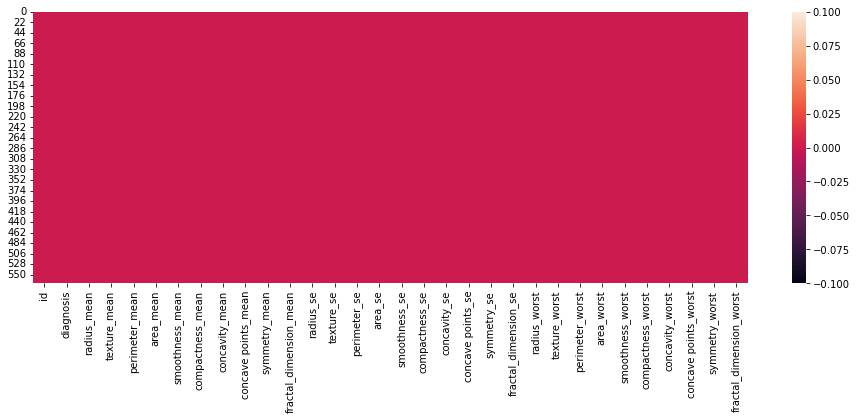

In [7]:
#looking for missing data
plt.figure(figsize=(16,5))
sns.heatmap(df.isnull())

In [8]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Heatmap

<AxesSubplot:>

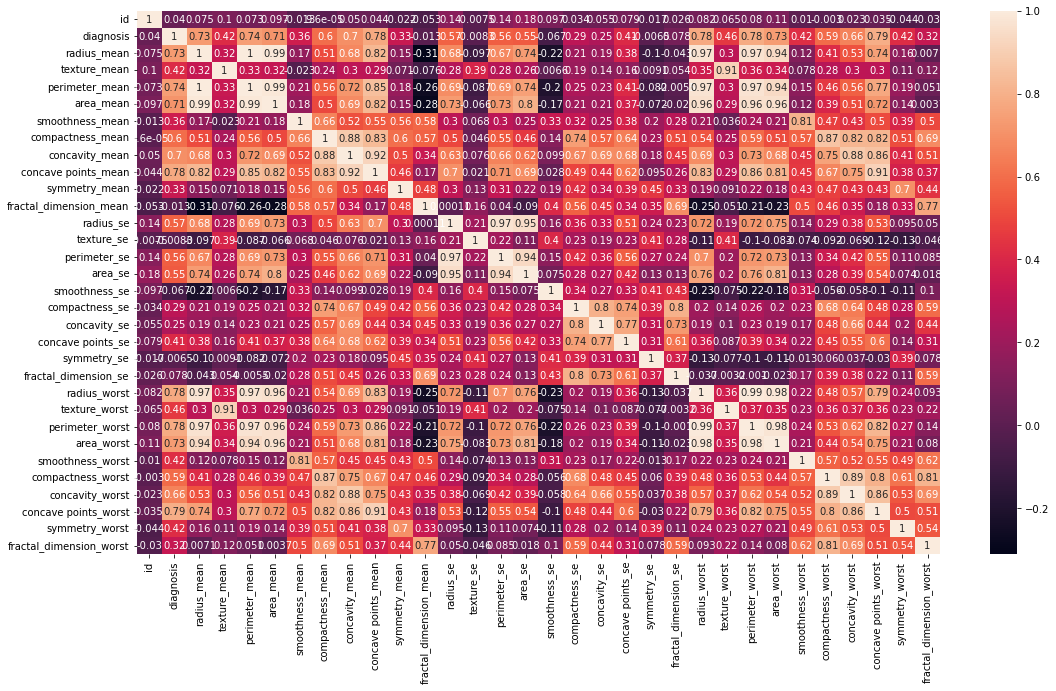

In [9]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)

In [10]:
df.drop(columns={'id', 'fractal_dimension_mean', 'fractal_dimension_se',
                 'texture_se', 'symmetry_se', 'smoothness_se',
                'compactness_se', 'concavity_se', 'fractal_dimension_worst',
                'symmetry_mean'},inplace=True)

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,1.0950,...,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.5435,...,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.7456,...,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.4956,...,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.7572,...,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


# Boxplot

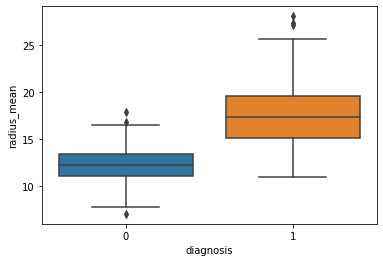

In [12]:
ax1 = sns.boxplot(x='diagnosis', y='radius_mean', data=df)

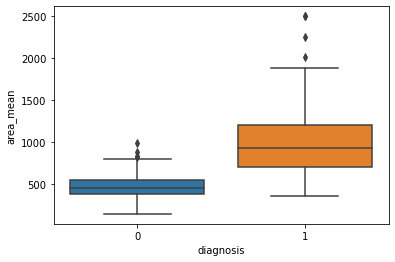

In [13]:
ax2 = sns.boxplot(x='diagnosis', y='area_mean', data=df)

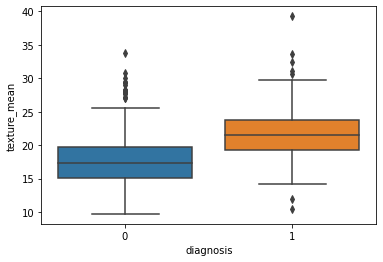

In [14]:
ax3 = sns.boxplot(x='diagnosis', y='texture_mean', data=df)

# Pairplot

In [15]:
#sns.pairplot(df)

In [16]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#standartilizing
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train) 
scaled_x_test = scaler.transform(x_test)

# KNN

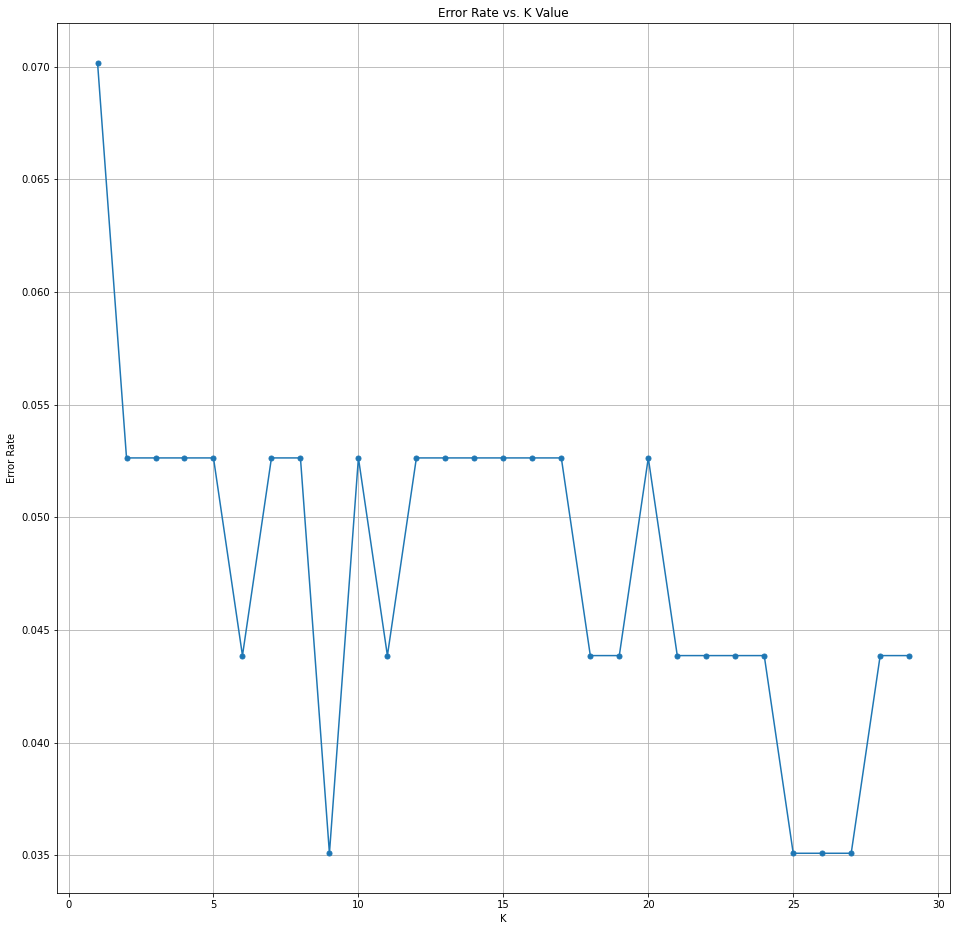

In [17]:
error_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train, y_train)
    pred_i = knn.predict(scaled_x_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(16, 16))
plt.plot(range(1, 30), error_rate, marker='.', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [18]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(scaled_x_train, y_train)
y_pred = knn.predict(scaled_x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[68  3]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [19]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


# Decision Tree

In [20]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x, y)
y_pred = tree.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771


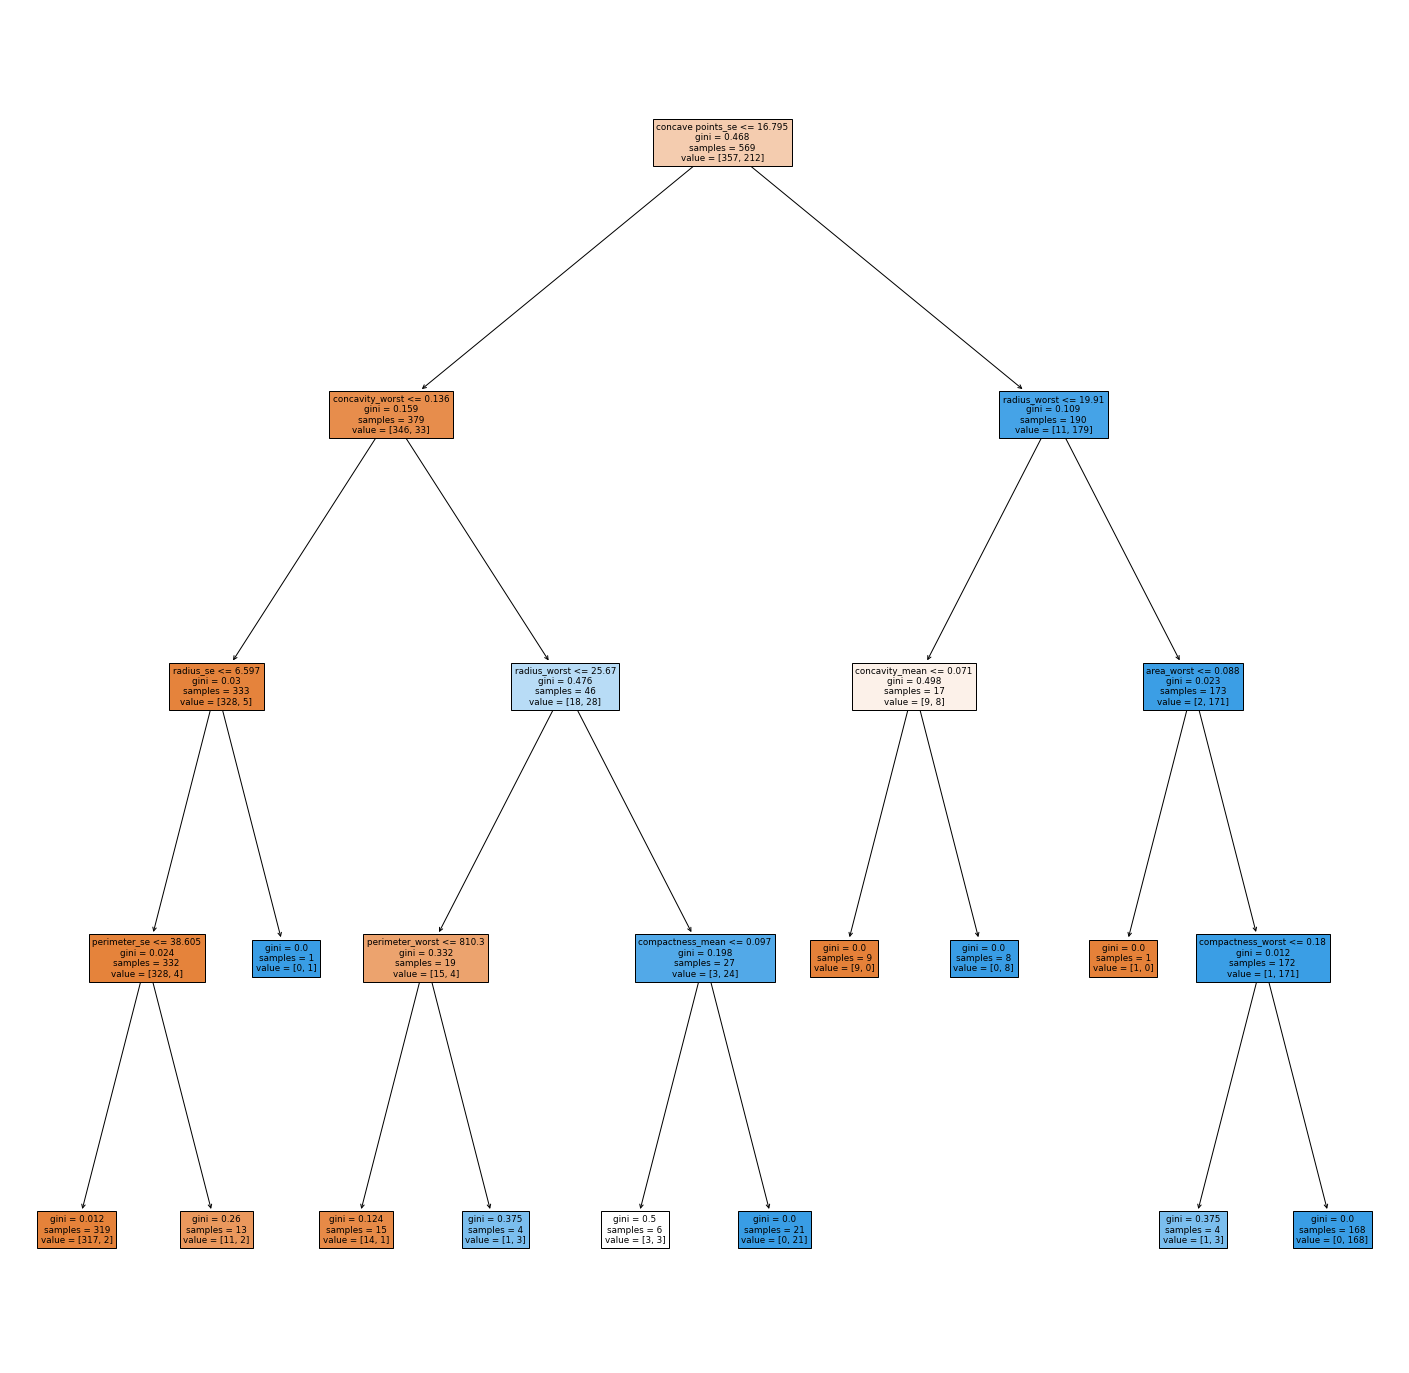

In [21]:
plt.figure(figsize=(25, 25))
plot_tree(tree, filled=True, feature_names=df.columns)
plt.show()

# SVM

In [22]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
gs = GridSearchCV(SVC(), param_grid)
k = gs.fit(x_train, y_train)
print("Accuracy  =", k.best_score_)
print("С =", k.best_params_['C'], "\ngamma =", k.best_params_['gamma'], "\nkernel =", k.best_params_['kernel'])

Accuracy  = 0.9516483516483516
С = 1000 
gamma = 0.0001 
kernel = rbf


In [23]:
svm = SVC(kernel=k.best_params_['kernel'], C=k.best_params_['C'], gamma=k.best_params_['gamma'])
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[67  4]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        71
           1       0.90      0.86      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114

Accuracy: 0.9122807017543859


# Random Forest

In [24]:
grid_params = {'max_depth': np.arange(1, 10), 'n_estimators': [150, 200, 250, 300]}
gs = GridSearchCV(RandomForestClassifier(), grid_params)
k = gs.fit(x_train, y_train)
print("Accuracy =", k.best_score_)
print("Max_depth =", k.best_params_['max_depth'], "\nn_estimators =", k.best_params_['n_estimators'])

Accuracy = 0.9604395604395604
Max_depth = 4 
n_estimators = 150


In [25]:
random_forest = RandomForestClassifier(max_depth=k.best_params_['max_depth'], n_estimators=k.best_params_['n_estimators'])
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[69  2]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158


# AdaBoost

In [27]:
grid_params = {'learning_rate':np.arange(0.2,1,0.2),'n_estimators': np.arange(50,200,50)}
gs = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5)), grid_params, verbose = 5, n_jobs = -1, cv = 5)
k = gs.fit(x_train,y_train)
print("Accuracy =",k.best_score_)
print("Learning_rate =",k.best_params_['learning_rate'], "\nn_estimators =", k.best_params_['n_estimators'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy = 0.9582417582417582
Learning_rate = 0.8 
n_estimators = 150


In [30]:
adaboost = k.best_estimator_
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)

In [31]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[67  4]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193
